In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.decomposition import PCA
import seaborn as sns

1) When reading in the data, set the index to "PID"

In [2]:
df_Housing = pd.read_csv('C:/Users/Dell/Downloads/ames-housing-dojo-for-ml.csv')
df_Housing.set_index('PID')

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,...,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,...,576.0,TA,TA,Y,NaN,320000.0,3,2006,3.0,1.0
534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,...,301.0,TA,TA,Y,NaN,151500.0,4,2007,1.0,0.0
528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,...,1220.0,TA,TA,Y,NaN,385000.0,6,2008,3.0,0.0
533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,...,476.0,TA,TA,Y,NaN,193800.0,2,2007,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903400030,RL,50.0,11672,Pave,Pave,AllPub,BrkSide,1Fam,1Story,5,...,210.0,Fa,Fa,N,NaN,109000.0,7,2006,1.0,0.0
533234020,FV,79.0,10646,Pave,NaN,AllPub,Somerst,1Fam,2Story,7,...,546.0,TA,TA,Y,NaN,223000.0,6,2008,3.0,1.0
908188140,RM,24.0,2522,Pave,NaN,AllPub,Edwards,Twnhs,2Story,7,...,380.0,TA,TA,Y,NaN,137500.0,4,2006,2.0,0.0


In [3]:
df_Housing.dtypes

PID                   int64
MS Zoning            object
Lot Frontage        float64
Lot Area              int64
Street               object
Alley                object
Utilities            object
Neighborhood         object
Bldg Type            object
House Style          object
Overall Qual          int64
Overall Cond          int64
Year Built            int64
Year Remodeled        int64
Exter Qual           object
Exter Cond           object
Bsmt Unf Sqft       float64
Total Bsmnt Sqft    float64
Central Air          object
Living Area Sqft    float64
Bedroom               int64
Kitchen               int64
Total Rooms           int64
Garage Type          object
Garage Yr Blt       float64
Garage Cars         float64
Garage Area         float64
Garage Qual          object
Garage Cond          object
Paved Drive          object
Fence                object
SalePrice           float64
Month                 int64
Year                  int64
Total Full Baths    float64
Total Half Baths    

In [4]:
df_Housing.isnull().sum()

PID                    0
MS Zoning              0
Lot Frontage         490
Lot Area               0
Street                 0
Alley               2732
Utilities              0
Neighborhood           0
Bldg Type              0
House Style            0
Overall Qual           0
Overall Cond           0
Year Built             0
Year Remodeled         0
Exter Qual             0
Exter Cond             0
Bsmt Unf Sqft          1
Total Bsmnt Sqft       1
Central Air            0
Living Area Sqft       0
Bedroom                0
Kitchen                0
Total Rooms            0
Garage Type          157
Garage Yr Blt        160
Garage Cars            1
Garage Area            1
Garage Qual          159
Garage Cond          159
Paved Drive            0
Fence               2358
SalePrice              0
Month                  0
Year                   0
Total Full Baths       2
Total Half Baths       5
dtype: int64

In [5]:
df_Housing.shape

(2930, 36)

In [6]:
df_Housing.isnull().sum()

PID                    0
MS Zoning              0
Lot Frontage         490
Lot Area               0
Street                 0
Alley               2732
Utilities              0
Neighborhood           0
Bldg Type              0
House Style            0
Overall Qual           0
Overall Cond           0
Year Built             0
Year Remodeled         0
Exter Qual             0
Exter Cond             0
Bsmt Unf Sqft          1
Total Bsmnt Sqft       1
Central Air            0
Living Area Sqft       0
Bedroom                0
Kitchen                0
Total Rooms            0
Garage Type          157
Garage Yr Blt        160
Garage Cars            1
Garage Area            1
Garage Qual          159
Garage Cond          159
Paved Drive            0
Fence               2358
SalePrice              0
Month                  0
Year                   0
Total Full Baths       2
Total Half Baths       5
dtype: int64

In [7]:
df_Housing.head(5)

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
0,907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,...,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
1,527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,...,576.0,TA,TA,Y,NaN,320000.0,3,2006,3.0,1.0
2,534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,...,301.0,TA,TA,Y,NaN,151500.0,4,2007,1.0,0.0
3,528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,...,1220.0,TA,TA,Y,NaN,385000.0,6,2008,3.0,0.0
4,533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,...,476.0,TA,TA,Y,NaN,193800.0,2,2007,3.0,0.0


In [8]:
# list of cols to drop
drop_from_model = ['Utilities', "Street",'MS Zoning','Lot Frontage',
                   'Lot Area','Neighborhood','Year Built']

X = df_Housing.drop(columns = [*drop_from_model,'SalePrice'])
y = df_Housing['SalePrice']

In [32]:
y

0       119900.0
1       320000.0
2       151500.0
3       385000.0
4       193800.0
          ...   
2925    109000.0
2926    223000.0
2927    137500.0
2928    231000.0
2929    200000.0
Name: SalePrice, Length: 2930, dtype: float64

3) Perform a train test split and transform the data as we did in the "Regression Metrics​" Lesson in week 2 of Intro to Machine Learning.

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 42)
Xtrain.head()

,PID,Alley,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,...,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Month,Year,Total Full Baths,Total Half Baths
844,905475520,NaN,1Fam,1Story,4,5,1994,TA,TA,0.0,...,1.0,308.0,TA,TA,N,NaN,8,2007,1.0,0.0
2730,909254010,NaN,1Fam,2Story,7,8,1990,TA,TA,600.0,...,1.0,215.0,Fa,TA,Y,MnPrv,5,2009,1.0,0.0
2793,531450090,NaN,1Fam,1Story,6,5,1991,TA,TA,78.0,...,2.0,496.0,TA,TA,Y,GdWo,6,2008,3.0,0.0
1187,903400040,Pave,1Fam,2Story,6,6,1950,TA,TA,764.0,...,2.0,520.0,TA,TA,N,GdPrv,7,2007,1.0,0.0
2770,527107130,NaN,1Fam,SLvl,7,5,1997,TA,TA,100.0,...,2.0,390.0,TA,TA,Y,NaN,6,2009,2.0,1.0


In [34]:
ytest

1357    155000.0
2367    130000.0
2822    213000.0
2126    345000.0
1544    135500.0
          ...   
2521    107000.0
707     295493.0
424     151000.0
69      157000.0
736     160500.0
Name: SalePrice, Length: 733, dtype: float64

In [35]:
num_cols = Xtrain.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
num_pipe = make_pipeline(impute_median, scaler)
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['PID', 'Overall Qual', 'Overall Cond', 'Year Remodeled',
       'Bsmt Unf Sqft', 'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom',
       'Kitchen', 'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Month', 'Year', 'Total Full Baths', 'Total Half Baths'],
      dtype='object')


In [36]:
ord_cols = ['Exter Qual','Exter Cond', 'Garage Qual',"Garage Cond"]
print("Ordinal Columns:", ord_cols)
# Create imputer for ordinal data 
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
qual_cond_order = ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order, qual_cond_order,
                           qual_cond_order, qual_cond_order]                           
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe 
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
## Making an ordinal_tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
ord_tuple = ('ordinal', ord_pipe, ord_cols)

Ordinal Columns: ['Exter Qual', 'Exter Cond', 'Garage Qual', 'Garage Cond']


In [37]:
ohe_cols = Xtrain.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
impute_na = SimpleImputer(strategy='most_frequent', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

OneHotEncoder Columns: Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
       'Paved Drive', 'Fence'],
      dtype='object')


In [38]:
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple], 
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['PID', 'Overall Qual', 'Overall Cond', 'Year Remodeled',
       'Bsmt Unf Sqft', 'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom',
       'Kitchen', 'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Month', 'Year', 'Total Ful...
                                 ['Exter Qual', 'Exter Cond', 'Garage Qual',
                                  'Garage Cond']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
       'Paved Drive', 'Fence'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [39]:
col_transformer.fit(Xtrain)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['PID', 'Overall Qual', 'Overall Cond', 'Year Remodeled',
       'Bsmt Unf Sqft', 'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom',
       'Kitchen', 'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Month', 'Year', 'Total Ful...
                                 ['Exter Qual', 'Exter Cond', 'Garage Qual',
                                  'Garage Cond']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
       'Paved Drive', 'Fence'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [40]:
X_train_tf = col_transformer.transform(Xtrain)
X_test_tf = col_transformer.transform(Xtest)
X_train_tf

array([[ 1.01517529, -1.45368089, -0.50219207, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.0352097 ,  0.64884506,  2.19320529, ...,  0.        ,
         1.        ,  0.        ],
       [-0.96799152, -0.05199692, -0.50219207, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.98512831,  0.64884506, -0.50219207, ...,  0.        ,
         1.        ,  0.        ],
       [-0.94729673, -0.75283891, -0.50219207, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.03455837, -0.05199692,  2.19320529, ...,  0.        ,
         1.        ,  0.        ]])

4) Once you have transformed X_train and X_test, (X_train_tf, and X_test_tf), add one more round of scaling that will also scale the one hot encoded features.

In [41]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_tf)
scaled_X_test = scaler.transform(X_test_tf)

5A) Instantiate a PCA object that will find the first 3 principal components (set n_components=3).

In [42]:
pca = PCA(n_components=3)

5B) Fit the PCA object on the scaled X_train data and transform both the scaled_X_train and scaled_X_test to create X_train_pcs and X_test_pcs.

In [43]:
X_train_pcs = pca.fit_transform(scaled_X_train)
X_test_pcs = pca.transform(scaled_X_test)

6) Run code to determine the amount of variance explained by the 3 Principal Components.

In [44]:
X_train_pcs=pd.DataFrame(X_train_pcs)
X_train_pcs.head(5)

,0,1,2
0,-5.709547,1.037217,0.455054
1,-2.295642,0.239978,-2.375948
2,0.507427,-1.990780,-0.240392
3,-2.482939,1.942031,-2.341498
4,1.080914,0.779486,-2.039415


In [45]:
X_test_pcs=pd.DataFrame(X_test_pcs)
X_test_pcs.head(5)

,0,1,2
0,-0.039723,0.094598,-1.194833
1,-3.810553,-1.359888,-0.851257
2,1.783683,-0.743680,1.409113
3,5.260546,3.324300,-0.773417
4,-1.609548,0.202972,-2.221287


7) Combine the dataset for EDA:  Concatenate X_train_pcs, X_test_pcs, and y_train and y_test back into a single DataFrame with the 3 PCs and the target as the columns and all of the data as the rows. 

In [46]:
ytest.head(10)

1357    155000.0
2367    130000.0
2822    213000.0
2126    345000.0
1544    135500.0
2415    117600.0
2227    148500.0
410     116000.0
761      90000.0
436     112500.0
Name: SalePrice, dtype: float64

In [57]:
#First, to combine X_train_pcs and y_train into plot_df_train using axis=1. 
plot_df_train = pd.concat([X_train_pcs, ytrain], axis = 1)
plot_df_train.head()

,0,1,2,SalePrice
0,-5.709547,1.037217,0.455054,119900.0
1,-2.295642,0.239978,-2.375948,320000.0
2,0.507427,-1.990780,-0.240392,151500.0
3,-2.482939,1.942031,-2.341498,385000.0
4,1.080914,0.779486,-2.039415,193800.0


In [50]:
ytest

1357    155000.0
2367    130000.0
2822    213000.0
2126    345000.0
1544    135500.0
          ...   
2521    107000.0
707     295493.0
424     151000.0
69      157000.0
736     160500.0
Name: SalePrice, Length: 733, dtype: float64

In [69]:
#Second, combine X_test_pcas and y_test into plot_df_test using axis=1
plot_df_test = pd.concat([X_test_pcs, ytest], axis = 1)
plot_df_test=plot_df_test.dropna()
plot_df_test.head()

,0,1,2,SalePrice
12,-3.115855,0.300834,-1.950793,101800.0
29,3.326990,-1.733598,3.603543,100000.0
30,-1.069636,-1.328585,-1.784761,213000.0
32,-1.554398,5.490349,-1.176429,129900.0
43,0.641781,-1.097706,0.288780,190000.0


In [70]:
plot_df_test.dtypes

0            float64
1            float64
2            float64
SalePrice    float64
dtype: object

In [71]:
#Finally, combine the 2 combined data frames (plot_df_train, plot_df_test) into 1 final combined plot_df using axis=0.
combined_plot_df=pd.concat([plot_df_train, plot_df_test], axis = 0)
combined_plot_df.head(5)

,0,1,2,SalePrice
0,-5.709547,1.037217,0.455054,119900.0
1,-2.295642,0.239978,-2.375948,320000.0
2,0.507427,-1.990780,-0.240392,151500.0
3,-2.482939,1.942031,-2.341498,385000.0
4,1.080914,0.779486,-2.039415,193800.0


8) Make a seaborn pairplot of the data.

In [72]:
X_train_pcs=pd.DataFrame(X_train_pcs)
X_train_pcs.head(2)

,0,1,2
0,-5.709547,1.037217,0.455054
1,-2.295642,0.239978,-2.375948


In [73]:
combined_plot_df = combined_plot_df[~combined_plot_df.index.duplicated()]

Text(0.5, 1.01, 'Visualizing First 3 PCs - Colored by SalePrice')

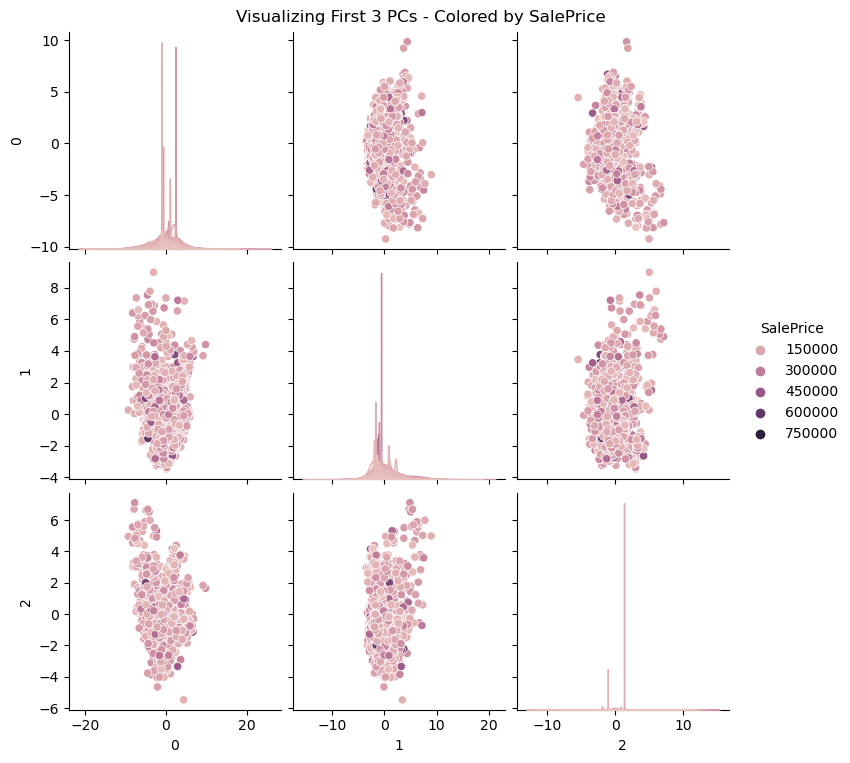

In [74]:
g_pca = sns.pairplot(data=combined_plot_df,  vars=X_train_pcs.columns, hue='SalePrice')
g_pca.fig.suptitle('Visualizing First 3 PCs - Colored by SalePrice', y=1.01)

9) Make a 3d scatter plot with Plotly Express.

In [75]:
import plotly.express as px
import plotly.io as pio

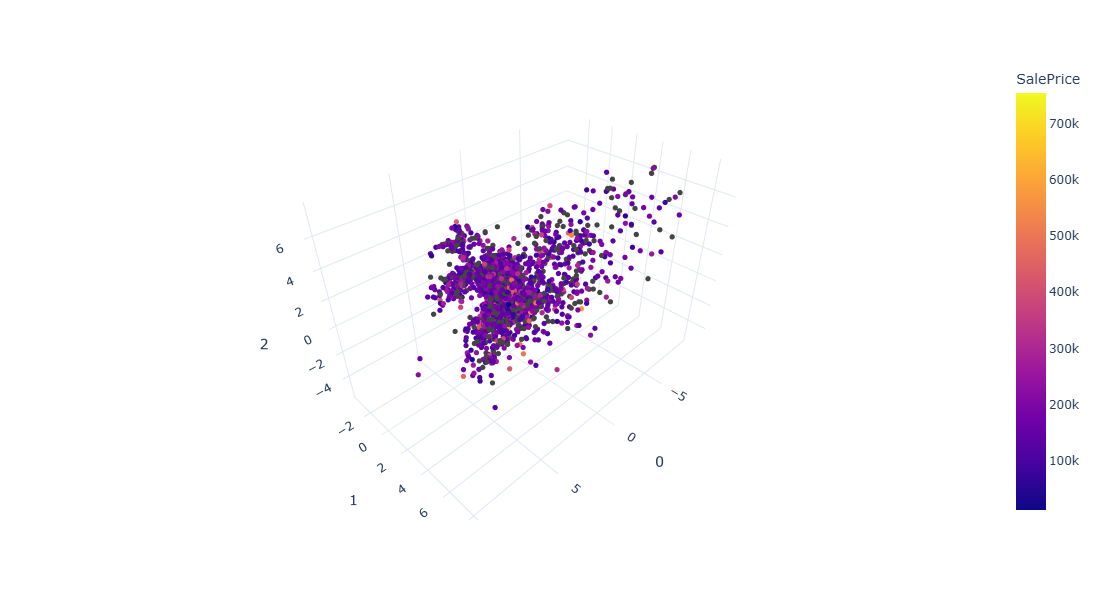

In [76]:
def update_scatter3d(fig):
    fig.update_traces({'marker':{'size':3}})
    fig.show(config={'scrollZoom':False})

fig = px.scatter_3d(combined_plot_df, x=0,y=1,z=2, width=800, height=600, color = "SalePrice", template = 'plotly_white')
update_scatter3d(fig)